# Digits Images Recognition
### Name: Adiel Delgado

### Import Libraries

In [56]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [57]:
df = pd.read_csv("mnist_784.csv")
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [58]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [59]:
df["class"].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [60]:
# Rename Columns
new_columns = {
    old_name: str(i)
    for i, old_name in enumerate(df.columns)
    if old_name != "class"
}
#new_columns

df = df.rename(columns=new_columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


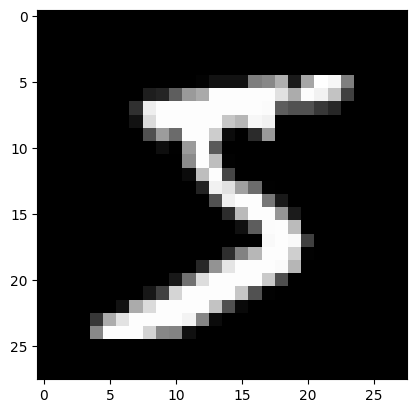

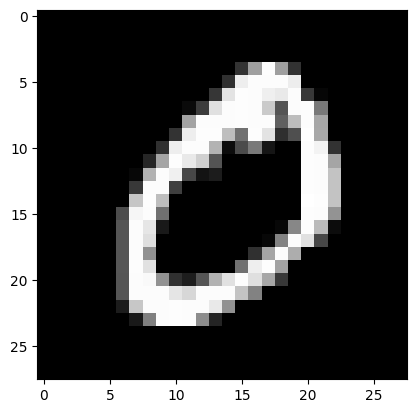

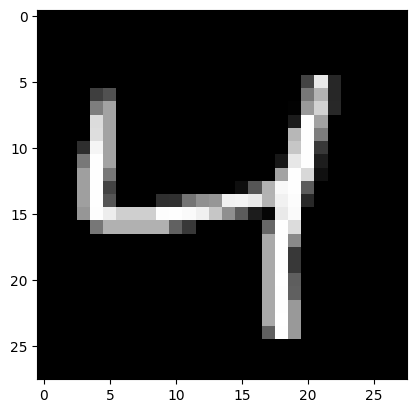

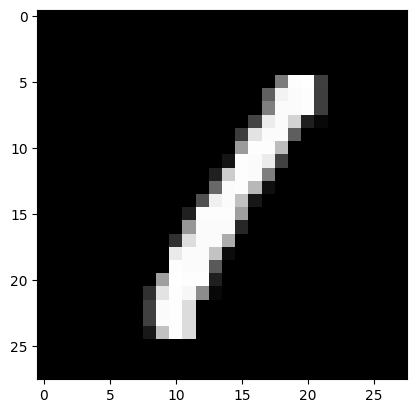

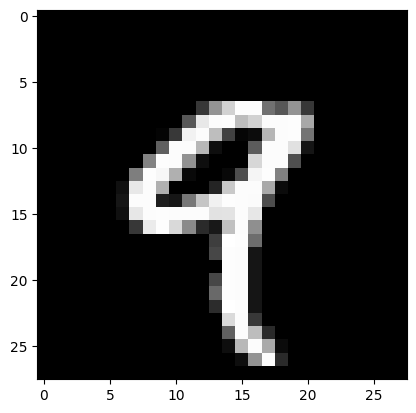

In [61]:
X = df.drop(columns="class")
y = df["class"]
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap="gray")
    plt.show()

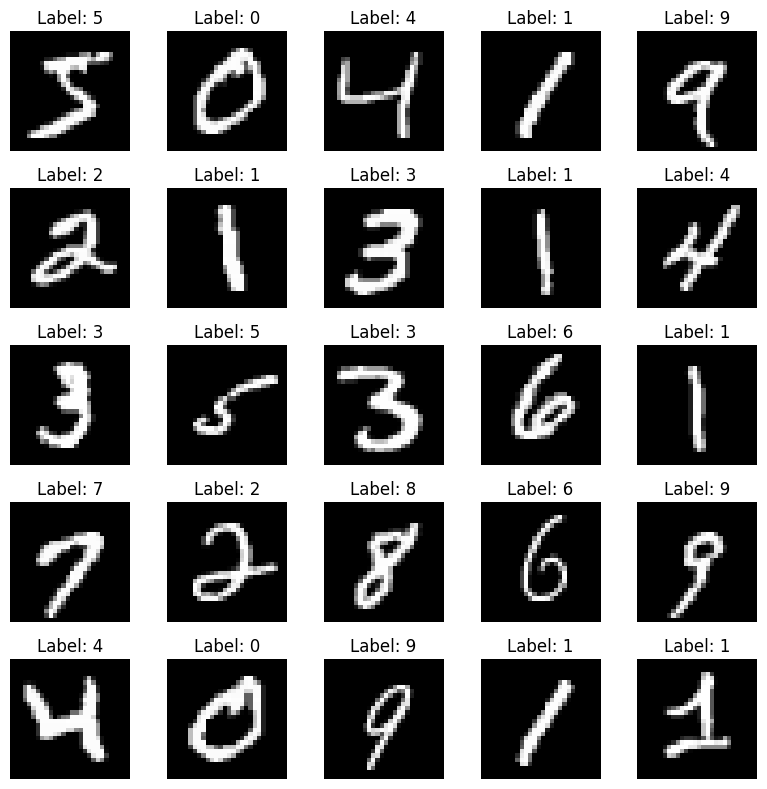

In [62]:
fix, axes = plt.subplots(5,5,figsize= (8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].values.reshape(28,28), cmap="gray")
    ax.set_title(f'Label: {df["class"].iloc[i]}')
    ax.axis("off")
plt.tight_layout()
plt.show()

### Neural Network Implementation

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=1, max_iter=10, activation="relu", learning_rate="constant", learning_rate_init=0.04)
mlp1 = MLPClassifier(hidden_layer_sizes=100, max_iter=10, activation="relu", learning_rate="constant", learning_rate_init=0.04)
mlp2 = MLPClassifier(hidden_layer_sizes=1000, max_iter=10, activation="relu", learning_rate="constant", learning_rate_init=0.04)

#### Train Models

In [65]:
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=1000, learning_rate_init=0.04, max_iter=10)

#### Evaluate the Model

In [66]:
predictions_NN = mlp.predict(X_test)
predictions_NN1 = mlp1.predict(X_test)
predictions_NN2 = mlp2.predict(X_test)

Actual Value: 8
Predicted Value: 3


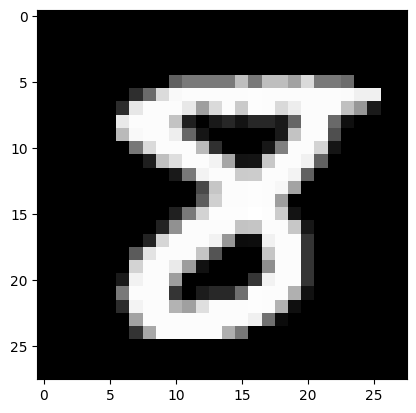

In [67]:
print(f'Actual Value: {y_test.iloc[0]}')
print(f'Predicted Value: {predictions_NN[0]}')
plt.imshow(X_test.iloc[0].values.reshape((28,28)), cmap="gray")

### Confusion Matrix

<Axes: >

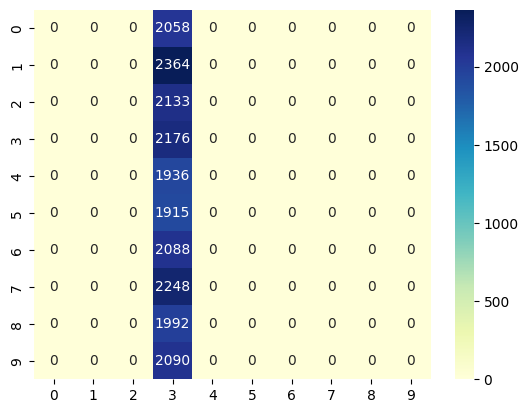

In [68]:
sns.heatmap(confusion_matrix(y_test, predictions_NN), fmt="d", cmap="YlGnBu", annot=True)

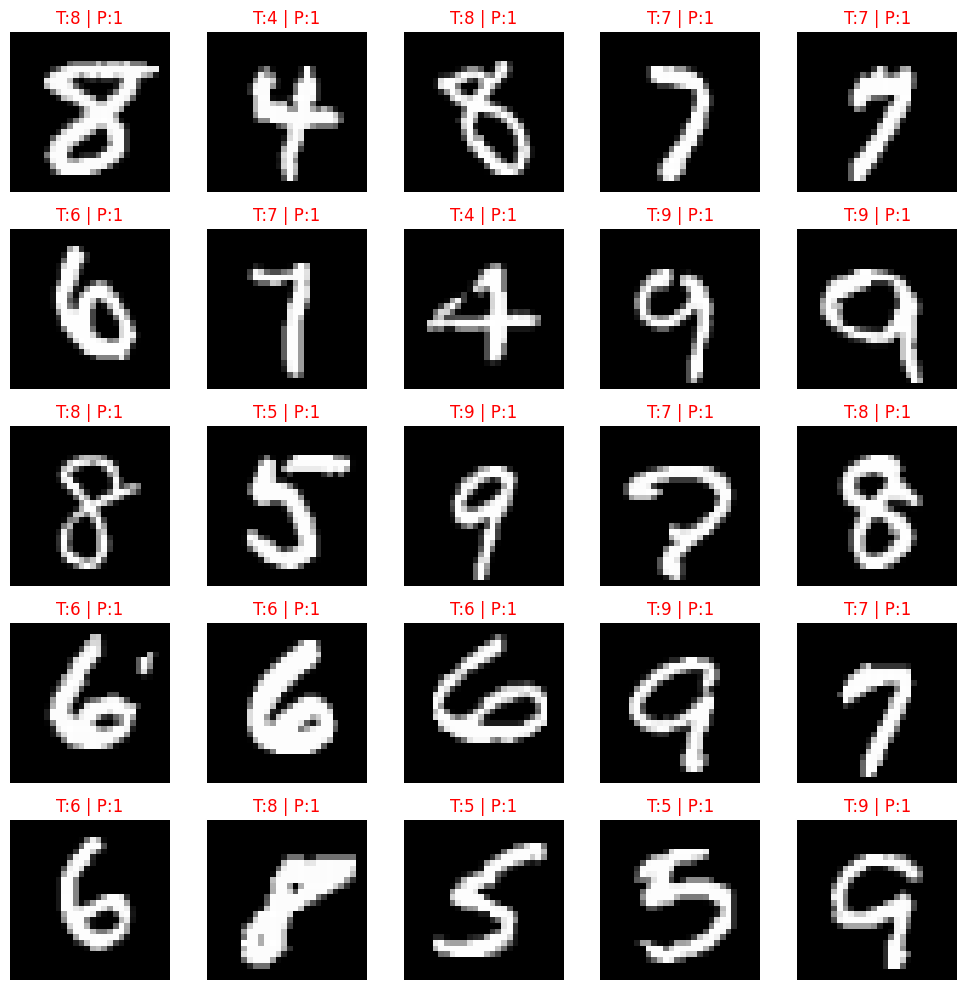

In [71]:
mask = y_test.isin([4,5,6,7,8,9])
X_sel = X_test[mask].reset_index(drop=True)
y_true_sel = y_test[mask].reset_index(drop=True)
y_pred_sel = predictions_NN1[mask]

error_mask = y_pred_sel != y_true_sel

X_sel = X_sel[error_mask]
y_true_sel = y_true_sel[error_mask].reset_index(drop=True)
y_pred_sel = y_pred_sel[error_mask]

fig, axes = plt.subplots(5,5, figsize=(10,10))

for i,ax in enumerate(axes.flat):
    if i >= len(X):
        break
    img = X_sel.iloc[i].values.reshape((28,28))
    true_label = y_true_sel.iloc[i]
    pred_label = y_pred_sel[i]
    
    ax.imshow(img, cmap="gray")
    ax.set_title(f'T:{true_label} | P:{pred_label}', color="green" if true_label == pred_label else "red")
    ax.axis("off")
plt.tight_layout()
plt.show()